Nama : Mohammad Hairullah <br>
NIM : 2041720074 <br>
Kelas : TI-3H <br>

1. Buat 5 jenis visualisasi yang dapat dihasilkan dari dataset yang diberikan! (5 poin)
2. Lakukan pemilahan data training dan testing yang sesuai dan proporsional dari data tersebut! (5 poin)
3. Terapkan dua jenis metode klasifikasi dan lakukan perbandingan akurasi  dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (30 poin)
4. Terapkan sebuah metode prediksi (berdasarkan tahun, misal: jumlah kegiatan pada tahun tertentu sebagai x dan jumlah  luaran sebagai y) serta hitung akurasinya dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (30 poin)
5. Buat Confusion Matrix dan ROC berdasarkan klasifikasi yang diterapkan pada nomor 4! (20 poin)
6. Tambahkan visualisasi berdasarkan nomor 4 dan 5 (masing-masing nomor minimal satu visualisasi)! (10 poin)

In [423]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [424]:
# Deklarasi dataset
path = './dataset_quiz.xlsx'
df = pd.read_excel(path)
df.fillna(0) # mengganti NaN menjadi value 0
df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206,7214,6211,8602,7801,0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214,7109,8402,7903,9202,0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911,8201,8701,9101,9003,0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402,7702,8602,8903,8903,0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201,8305,5911,5903,8402,0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


## Nomor 1

### Visualisasi

#### Plot (Rata-rata Keterlibatan Volunteer)

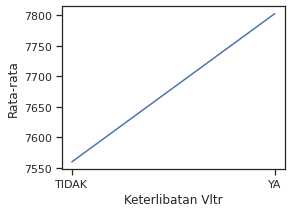

In [425]:
# data visualisasi keterlibatan VLTR
df.describe()
keterlibatan_ya = df.groupby('keterlibatan_vltr')['id_ketua'].mean()
keterlibatan_ya
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(3)
plt.plot(keterlibatan_ya)
plt.ylabel('Rata-rata')
plt.xlabel('Keterlibatan Vltr')
plt.show()

#### Scatter (Jumlah keterlibatan volunteer berdasarkan tahun)

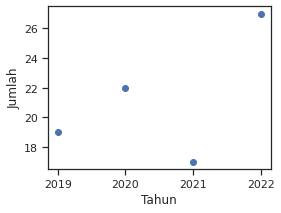

In [430]:
column_tahun = df.groupby('tahun').count()
names = ['2019', '2020', '2021', '2022']
values = column_tahun['keterlibatan_vltr'].values
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(3)
plt.scatter(names, values)
plt.ylabel('Jumlah')
plt.xlabel('Tahun')
plt.show()

#### Bar (Jumlah skema dari Reguler dan Kemitraan)

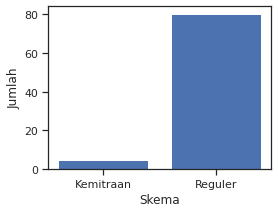

In [431]:
column_skema = df.groupby('skema').count()
names = ['Kemitraan', 'Reguler']
values = column_skema['keterlibatan_vltr'].values
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(3)
plt.bar(names, values)
plt.ylabel('Jumlah')
plt.xlabel('Skema')
plt.show()

#### Scatter (Jumlah keterlibatan volunteer berdasarkan Potensi HKI)

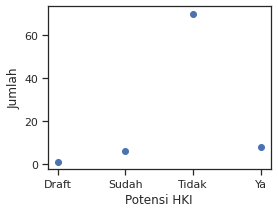

In [432]:
column_potensi_hki = df.groupby('potensi_hki').count()
names = ['Draft', 'Sudah', 'Tidak', 'Ya']
values = column_potensi_hki['keterlibatan_vltr'].values
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(3)
plt.scatter(names, values)
plt.ylabel('Jumlah')
plt.xlabel('Potensi HKI')
plt.show()

#### Plot

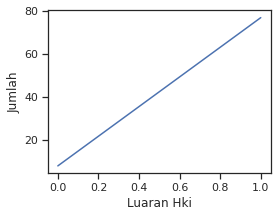

In [433]:
column_luaran_hki = df.groupby('luaran_hki').count()
values = column_luaran_hki['keterlibatan_vltr'].values
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(3)
plt.plot(values)
plt.ylabel('Jumlah')
plt.xlabel('Luaran Hki')
plt.show()

## Nomor 2

In [434]:
# Encoding
# Fungsi encoding yang akan digunakan adalah LabelEncoder
# Hal ini karena kita hanya mengganti nilai variabel dari nama berupa string menjadi angka. Sama halnya dengan label

from sklearn.preprocessing import LabelEncoder

# Inisiasi label encoder
encode = LabelEncoder()

# Terpakan label encoder
df['keterlibatan_vltr'] = encode.fit_transform(df['keterlibatan_vltr'])
df['luaran_hki'] = encode.fit_transform(df['luaran_hki'])
df['luaran_lain'] = encode.fit_transform(df['luaran_lain'])
df['jenis_luaran_hki'] = encode.fit_transform(df['jenis_luaran_hki'])
df['jenis_luaran_lain'] = encode.fit_transform(df['jenis_luaran_lain'])
df['potensi_hki'] = encode.fit_transform(df['potensi_hki'])
df['skema'] = encode.fit_transform(df['skema'])
df['tahun'] = encode.fit_transform(df['tahun'])
df['status_luaran_lain'] = encode.fit_transform(df['status_luaran_lain'])

# Cek hasil
df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206,7214,6211,8602,7801,0,0,0,0,1,1,1,2,0,3,1
1,7214,7109,8402,7903,9202,0,0,0,0,1,1,1,2,0,3,1
2,5911,8201,8701,9101,9003,0,0,0,0,1,1,1,2,0,3,1
3,8402,7702,8602,8903,8903,0,0,0,0,1,1,1,2,0,3,1
4,8201,8305,5911,5903,8402,0,0,0,0,1,1,1,2,0,3,1


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


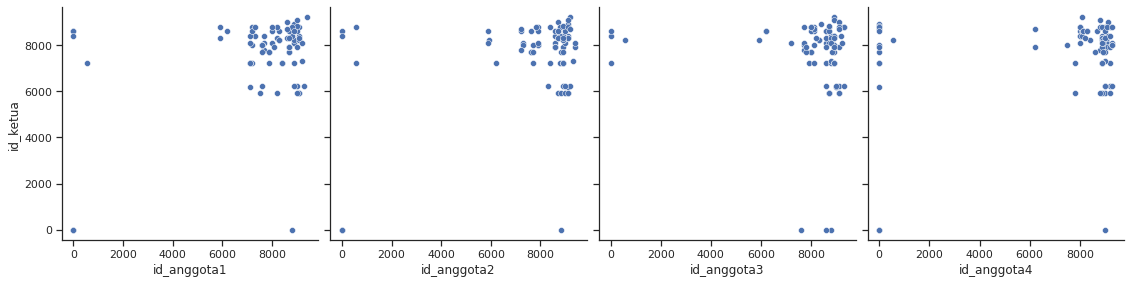

In [435]:
# operasi visualisasi
sns.pairplot(df, x_vars=['id_anggota1', 'id_anggota2', 'id_anggota3', 'id_anggota4'], 
             y_vars='id_ketua', size=4, aspect=1, kind='scatter')
plt.show()

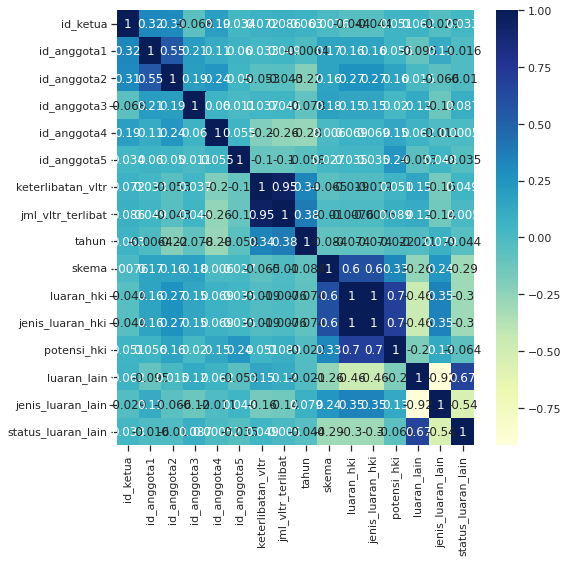

In [436]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [437]:
df['id_ketua'] = df['id_ketua'].astype(float)
df['id_anggota1'] = df['id_anggota1'].astype(float)
df['id_anggota2'] = df['id_anggota2'].astype(float)
df['id_anggota3'] = df['id_anggota3'].astype(float)
df['id_anggota4'] = df['id_anggota4'].astype(float)
df['id_anggota5'] = df['id_anggota5'].astype(float)

In [438]:
df.dtypes

id_ketua              float64
id_anggota1           float64
id_anggota2           float64
id_anggota3           float64
id_anggota4           float64
id_anggota5           float64
keterlibatan_vltr       int64
jml_vltr_terlibat       int64
tahun                   int64
skema                   int64
luaran_hki              int64
jenis_luaran_hki        int64
potensi_hki             int64
luaran_lain             int64
jenis_luaran_lain       int64
status_luaran_lain      int64
dtype: object

In [439]:
columns = df.iloc[:,[6,7,8,9,10,11,12,13,14,15]]
X = df.iloc[:,:5]
y = columns.iloc[:,0]

In [440]:
# Split data training dan testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## Nomor 3

### Klasifikasi Naive Bayes Categorical 

In [444]:
# Kita akan menggunakan CategoricalNB untuk kasus ini
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score

# Inisasi CategoricalNB
cnb = CategoricalNB()

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
cnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = cnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = cnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9558823529411765
Hasil akurasi data test: 0.47058823529411764


### Klasifikasi Naive Bayes GaussianNB

In [445]:
from sklearn.preprocessing import StandardScaler

# Inisasi obyek StandardScaler
scaler = StandardScaler()

# Standarisasi pada fitur di X_train dan X_test
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [446]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# Buat obyek GaussianNB lain
gnb_std = GaussianNB()

# Fit dengan data yang telah di standarisasi
gnb_std.fit(X_train_std, y_train)

# Prediksi dengan data training
y_train_std_pred = gnb_std.predict(X_train_std)

# Evaluasi akurasi training data
acc_train_std = accuracy_score(y_train, y_train_std_pred)

# Prediksi test data yang telah di standarisasi
y_test_std_pred = gnb_std.predict(X_test_std)

# Evaluasi akurasi testing data
acc_test_std = accuracy_score(y_test, y_test_std_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data training terstandarisasi: {acc_train_std}')
print(f'Hasil akurasi data testing terstandarisasi: {acc_test_std}')

Hasil akurasi data training terstandarisasi: 0.6323529411764706
Hasil akurasi data testing terstandarisasi: 0.47058823529411764


### Klasifikasi Naive Bayes DecisionTree

In [447]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [448]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' sebagai kriteria informasi
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy kedalam training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [449]:
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [450]:
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [451]:
from sklearn.metrics import accuracy_score

# menggunakan dt_entropy untuk memprediksi test set labels
y_pred = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

# mengevaluasi accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Print accuracy_entropy
print("Accuracy achieved by using entropy: ", accuracy_entropy)

# Print accuracy_gini
print("Accuracy achieved by using gini: ", accuracy_gini)

Accuracy achieved by using entropy:  0.5294117647058824
Accuracy achieved by using gini:  0.5294117647058824


## Nomor 4

### Metode prediksi menggunakan Regresi

In [452]:
df.groupby('tahun').mean()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
tahun,,,,,,,,,,,,,,,
0,7310.000000,7509.421053,8094.000000,7833.947368,8234.526316,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,3.000000,1.000000
1,7800.227273,7752.409091,8590.363636,8594.772727,7653.090909,400.545455,0.681818,1.772727,0.909091,0.818182,0.818182,2.000000,0.454545,1.772727,1.318182
2,7951.941176,8121.235294,8130.470588,8710.647059,8130.235294,0.000000,0.529412,1.529412,0.941176,0.941176,0.941176,2.058824,0.176471,2.705882,1.176471
3,7652.703704,7451.851852,6983.518519,7568.555556,5710.148148,0.000000,0.592593,1.814815,0.925926,0.888889,0.888889,1.962963,0.111111,2.814815,1.037037


In [453]:
import statsmodels.api as sm
# keterangan tahun [2019 = 0], [2020 = 1], [2021 = 2], [2022 = 3]
data_tahun_2019 = df[(df['tahun'] == 0)]
data_tahun_2019.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,0.0,0,0,0,1,1,1,2,0,3,1
1,7214.0,7109.0,8402.0,7903.0,9202.0,0.0,0,0,0,1,1,1,2,0,3,1
2,5911.0,8201.0,8701.0,9101.0,9003.0,0.0,0,0,0,1,1,1,2,0,3,1
3,8402.0,7702.0,8602.0,8903.0,8903.0,0.0,0,0,0,1,1,1,2,0,3,1
4,8201.0,8305.0,5911.0,5903.0,8402.0,0.0,0,0,0,1,1,1,2,0,3,1


In [454]:
Xbaru = data_tahun_2019['id_ketua']
ybaru = data_tahun_2019['id_anggota1']

In [455]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xbaru, ybaru, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [456]:
X_train.head()
y_train.head()

18    7903.0
6     8803.0
9     7206.0
11    8301.0
5     7607.0
Name: id_anggota1, dtype: float64

In [457]:
# training model
X_train_sm = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [458]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const       8648.613535
id_ketua      -0.106060
dtype: float64

In [459]:
# analisis statistika dari garis regresi
lr.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            id_anggota1   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     2.680
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.130
Time:                        01:13:54   Log-Likelihood:                -98.718
No. Observations:                  13   AIC:                             201.4
Df Residuals:                      11   BIC:                             202.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8648.6135    485.858     17.801      0.000    7579.246    9717.981
id_ketua      -0.1061      0.065     -1.637      0.130      -0.249       0.037
==============================================================================
Omnibus:                        1.098   Durbin-Watson:                   2.223
Prob(Omnibus):                  0.578   Jarque-Bera (JB):                0.714
Skew:                           0.535   Prob(JB):                        0.700
Kurtosis:                       2.585   Cond. No.                     2.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

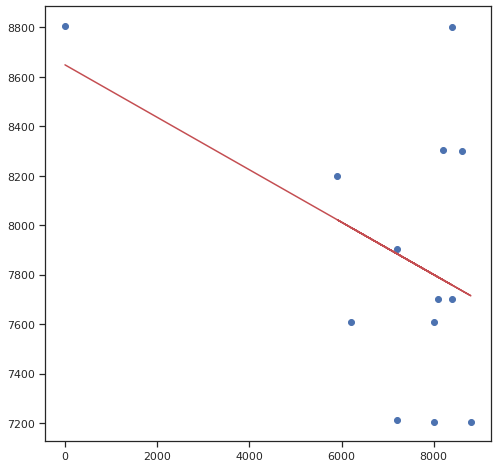

In [460]:
# visualisasi garis regresi
# print(X.size, y.size)
plt.scatter(X_train, y_train)
plt.plot(X_train, 8648.613535 + (-0.106060)*X_train, 'r')
plt.show()

In [461]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


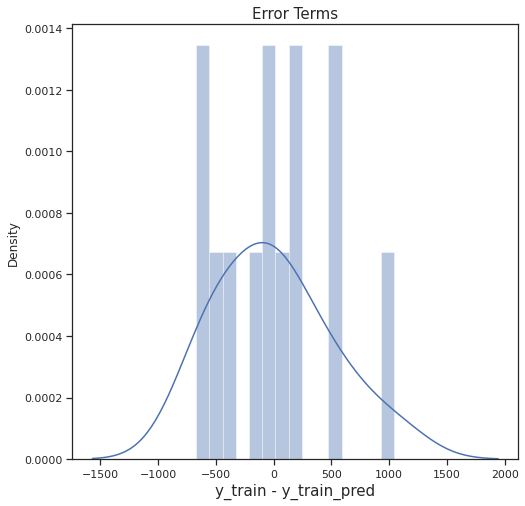

In [462]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

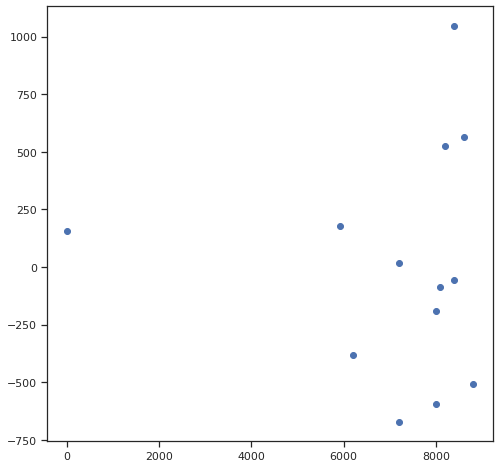

In [463]:
plt.scatter(X_train,res)
plt.show()

In [464]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


15    8022.539303
13    7789.312598
17    7714.964294
12    7736.282424
14    7884.342670
dtype: float64

In [465]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

-0.12141348922489636

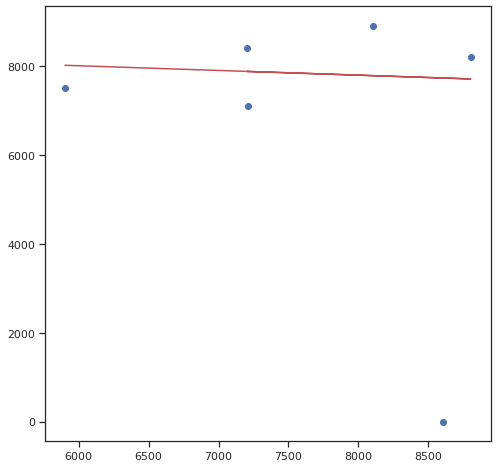

In [466]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

## Nomor 5

### Konfigurasi data (Confusion Matrix)

In [477]:
import itertools
from sklearn import svm
from sklearn import metrics
from sklearn.datasets import load_breast_cancer

In [478]:
X = df.iloc[:,:5]
y = columns.iloc[:,0]

In [500]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

In [501]:
y_train[:10].head()

32    1
56    0
24    0
7     0
39    0
Name: keterlibatan_vltr, dtype: int64

In [481]:
classifier = svm.SVC(kernel='linear', probability=True, verbose=True)

In [482]:
classifier.fit(X_train, y_train)

[LibSVM]

SVC(kernel='linear', probability=True, verbose=True)

In [483]:
y_preds = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)

In [484]:
y_proba = y_proba[:,1].reshape((y_proba.shape[0],))

In [485]:
y_proba[:5], y_preds[:5], y_test[:5]

(array([0.49045501, 0.56534961, 0.47168269, 0.58637283, 0.29553391]),
 array([0, 0, 0, 0, 1]),
 33    1
 30    1
 45    1
 8     0
 78    1
 Name: keterlibatan_vltr, dtype: int64)

#### Confusion Matrix

In [502]:
conf = metrics.confusion_matrix(y_test, y_preds)
conf

array([[9, 0],
       [6, 2]])

In [503]:
def get_confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y_true, y_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

In [504]:
conf = get_confusion_matrix(y_test, y_preds)
conf

array([[9, 0],
       [6, 2]])

Text(0.5, 87.37999999999997, 'Predicted label')

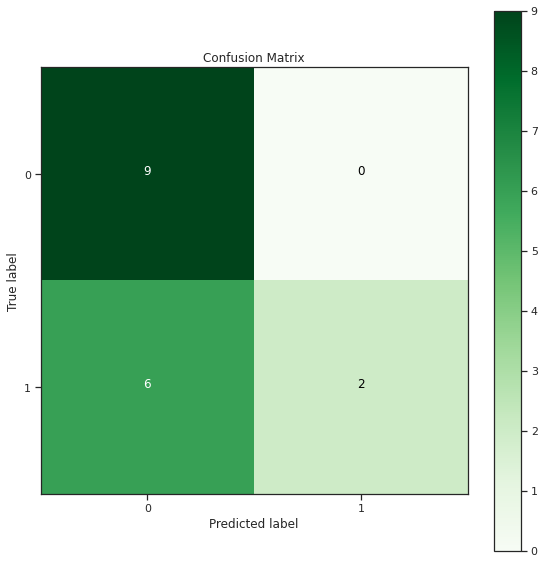

In [505]:
classes = [0, 1]

plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [506]:
TP = true_pos = 3
TN = true_neg = 9
FP = false_pos = 0
FN = false_neg = 6

#### ROC curve (Receiver Operating Characteristic curve)

In [507]:
def get_roc_curve(y_test, y_proba, delta=0.1):

    thresh = list(np.arange(0, 1, delta)) + [1]
    TPRs = []
    FPRs = []
    y_pred = np.empty(y_proba.shape)
    for th in thresh:
        y_pred[y_proba < th] = 0
        y_pred[y_proba >= th] = 1
        
        
        (TN, FP), (FN, TP) = get_confusion_matrix(y_test, y_pred)
        
        TPR = TP / (TP + FN)  # sensitivity
        FPR = FP / (FP + TN)  # 1 - specificity
        TPRs.append(TPR)
        FPRs.append(FPR)
    return FPRs, TPRs, thresh

In [508]:
delta = 0.001
FPRs, TPRs, _ = get_roc_curve(y_test, y_proba, delta)

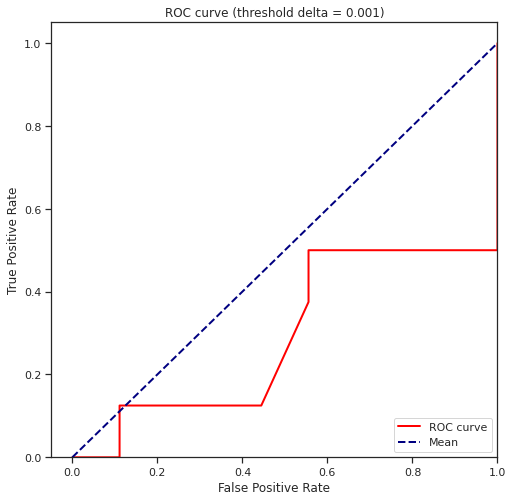

In [509]:

plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve (threshold delta = {delta})')
plt.legend(loc="lower right")
plt.show()

In [510]:

rand_proba = np.random.random(size=(y_proba.shape))
rand_proba[:5] 

array([0.29122914, 0.61185289, 0.13949386, 0.29214465, 0.36636184])

In [511]:
FPRs, TPRs, _ = get_roc_curve(y_test, rand_proba, delta)  

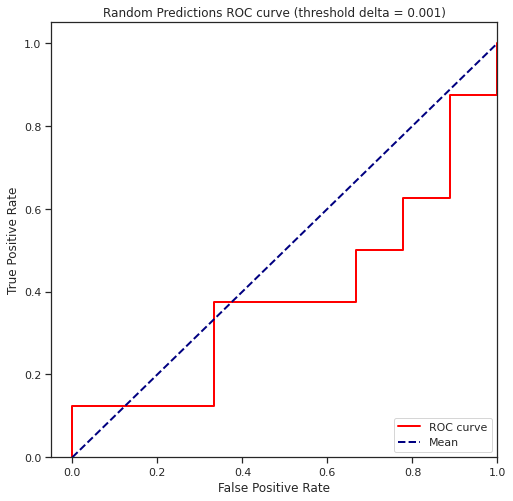

In [512]:

plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Random Predictions ROC curve (threshold delta = {delta})')
plt.legend(loc="lower right")
plt.show()

In [513]:
FPRs, TPRs, _ = metrics.roc_curve(y_test, y_proba)

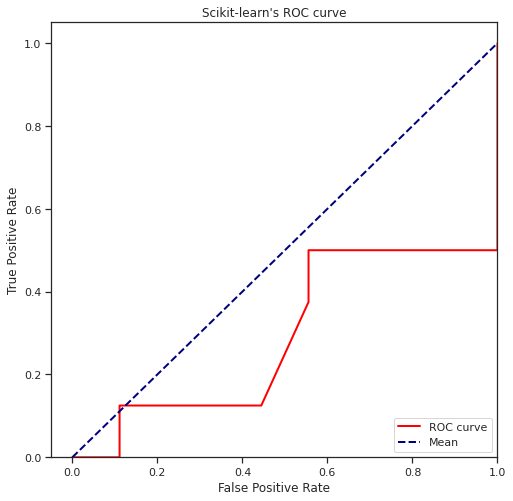

In [514]:

plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Scikit-learn's ROC curve")
plt.legend(loc="lower right")
plt.show()

In [515]:
FPRs, TPRs, _ = metrics.roc_curve(y_test, rand_proba) 

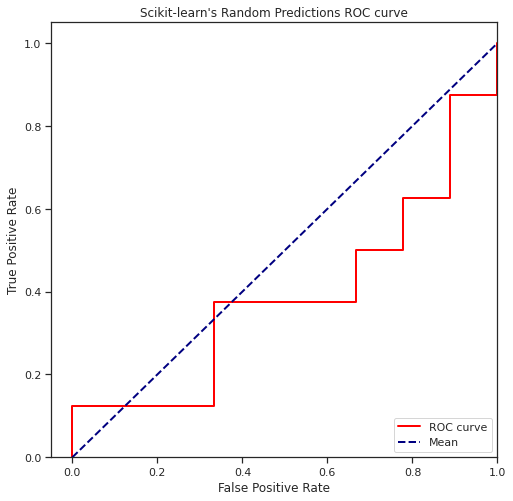

In [516]:
plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Scikit-learn's Random Predictions ROC curve")
plt.legend(loc="lower right")
plt.show()

## Nomor 6 = Visualisasi ada pada disetiap nomor yaitu (nomor 4 dan 5)